PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#Práctica 1

##Introducción

Esta es la primera práctica del segundo laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo priemro que debemos hacer es cargar y leer la base de datos:

In [1]:
#!pip install mlxtend==0.13.0
!pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
#Importar librerías
#!apt install mlxtend
import numpy as np #numpy
import pandas as pd #pandas
import sklearn as sk #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
#from mlxtend.frequent_patterns import apriori
#from apyori import apriori #apriori
from mlxtend.preprocessing import TransactionEncoder
#from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori, association_rules, fpmax

#from mlxtend.frequent_patterns import frequent_patterns
#from mlxtend import frequent_patterns
#from mlxtend.frequent_patterns import frequent_patterns

#Importamos la base de datos
df = pd.read_csv('BlackFriday.csv',sep=',')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


----------------

----------------

Subimos la base de datos, df.info nos aporta la infomación que contiene la base de datos, vemos el tipo, la cantidad de las variables con las que trabajamos... y .head vamos a ver que forma tiene la base de datos y las primeras filas de esta.

Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado. Los seis pasos que componen Crisp-DM son los siguientes:

- Comprensión de los negocios y definición del problema: comprender la naturaleza del problema y los objetivos de negocio.

- Comprensión de los datos: recopilación inicial, descripción y exploración  de datos.

- Preparación de los datos: Selección, limpieza, construcción, integración, formateo de los datos.

- Modelado: aplicar las técnicas de minería de datos a los dataset.

- Evaluación: determinar si los resultados son útiles a las necesidades del negocio.

- Despliegue: explotar utilidad de los modelos, integrándolos en las tareas de toma de decisiones de la organización -> Call to Action. 

##Comprensión de los negocios y definición del problema

La librería se usará de la siguiente manera:
1) Empezaremos obteniendo los itemsets frecuentes para k=1. En este punto necesitaremos obtener el
soporte de los itemset. Por lo tanto, se tendrá que usar un método que dado un itemset devuelva su
soporte.

2) Para k≥2.
a. Mostrar los itemset frecuentes candidatos y su soporte.

3) Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes.

4) Mostrar todas las posibles reglas con la confianza de cada una de ellas.

5) Listar todas las reglas que sean de alta confianza.

6) Usar los siguientes métodos. Dado un antecesor, devolver todas las reglas que contengan a dicho
antecesor. Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza.

7) Utiliza las representaciones gráficas que consideres adecuadas para representar las reglas obtenidas
y obtener conclusiones a partir de los datos.

A partir de lo anterior de pide:
- Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.
- ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos 
- ¿Qué tipo reglas desaparecen según la configuración y categorías (género, edad y tipo de producto)
consideradas? ¿Por qué? 
- Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado interesantes
obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y
min_threshold. Justifica los resultados. 
- Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de
alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos 

## Comprensión de los datos

La base de datos que utilizaremos consta de 233599 observaciones. Teniendo en ceunta que el trabajo que vamos a realizar, utilizanod el algoritmo apriori, queremos sacar regalas y con todos estos datos, lo que nos hace pensar es que vamos a encontrar muchísimas reglas a partir de estos datos.

La clave está en cuales son las que más nos interesan, basandonos en su confianza, y una vez hallado esto debemos tomar decisiones para que usando estas reglas vendamos el mayor número de producto, para aumentar nuestras gananzas.

Existen 11 tipos de atributos distintos: 

- User_ID: número para identificar al usuario.
- Product_ID: número para identificar el producto.
- Gender: Género del comprador.	
- Age: Edad del comprador.
- Occupation: A lo que se dedica el comprador, ya pasasdo a categórica.
- City_Category: Categoría de la ciudad donde reside el user.
- Stay_In_Current_City_Years: El tiempo que lleva en la ciudad.
- Marital_Status: Estado civil.
- Product_Category_1: La categoría principal del producto.
- Product_Category_2: Siguente categoría.
- Product_Category_3: Última categoría del producto.



##Preparación de los datos

Se procede a estudiar la cantidad de NaN por cada atributo.

In [3]:
usernan = df['User_ID'].isna().sum()
print(f"La cantidad de NaN que existen en la variable User_ID es:{usernan}")
productnan = df['Product_ID'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_ID es:{productnan}")
gendernan = df['Gender'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Gender es:{gendernan}")
agenan = df['Age'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Age es:{agenan}")
ocupationan = df['Occupation'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Occupation es:{ocupationan}")
City_Categorynan = df['City_Category'].isna().sum()
print(f"La cantidad de NaN que existen en la variable City_Category es:{City_Categorynan}")
Stay_In_Current_City_Yearsnan = df['Stay_In_Current_City_Years'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Stay_In_Current_City_Years es:{Stay_In_Current_City_Yearsnan}")
Marital_Statusnan = df['Marital_Status'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Marital_Status es:{Marital_Statusnan}")
Product_Category_1nan = df['Product_Category_1'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_Category_1 es:{Product_Category_1nan}")
Product_Category_2nan = df['Product_Category_2'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_Category_2 es:{Product_Category_2nan}")
Product_Category_3nan = df['Product_Category_3'].isna().sum()
print(f"La cantidad de NaN que existen en la variable Product_Category_3 es:{Product_Category_3nan}")

La cantidad de NaN que existen en la variable User_ID es:0
La cantidad de NaN que existen en la variable Product_ID es:0
La cantidad de NaN que existen en la variable Gender es:0
La cantidad de NaN que existen en la variable Age es:0
La cantidad de NaN que existen en la variable Occupation es:0
La cantidad de NaN que existen en la variable City_Category es:0
La cantidad de NaN que existen en la variable Stay_In_Current_City_Years es:0
La cantidad de NaN que existen en la variable Marital_Status es:0
La cantidad de NaN que existen en la variable Product_Category_1 es:0
La cantidad de NaN que existen en la variable Product_Category_2 es:72344
La cantidad de NaN que existen en la variable Product_Category_3 es:162562


Se observa que en Product_Category_2 y Product_Category_3, el número de NaN es elevado. Esto es porque los productos puede que no tengan segunda o tercera clasificación. 
Para lidiar con la falta de datos, se rellenan con 0, ya que no hay ninguna categoría que sea representado con este número. Se ha considerado eliminar los registros que tienen  NaN, pero estaríamos eliminando por tanto posibles reglas de aquellos productos que sí que tienen categoría 1. 

In [4]:
# Rellenamos los valores na con 0, ya que no tiene categoría
df = df.fillna(0)

# Quitamos los duplicados
df = df.drop_duplicates()

##Modelado

En este proceso de la metodología Crisp-DM vamos a modelar los datos de manera que puedan ser tratados de manera correcta por la técnica de data mining seleccionada. 
Para ello, vamos a agrupar los datos por atributos en función de User_ID y Product_Category_1, para poder identificar la compra y atributos de cada usuario. 

Una transacción se considera un usuario, en la cual se recopila información sobre: 
-  La identificación del producto
-  Género del cliente 
-  Edad 
-  Ocupación 
-  Ciudad de residencia
-  Años viviendo en la ciudad
-  Estado civil 
-  Categoría 1 del producto
-  Categoría 2 del producto
-  Categoría 3 del producto

De esta manera se podrán obtener reglas eficientes que definan modelos con mayor confianza con el fin de optimizar la venta de productos en el Black Friday.  

Otro de los motivos por lo que los datos se han agrupado, es por la correcta interpretación de las reglas, ya que si no se agrupan, no se podrán identificar posibles reglas, porque las compras se consideran de un sólo producto, y no se podrían hacer posibles relaciones de ocurrencia entre ellos. 

In [5]:
df_User_Product = (df
        .groupby(['User_ID', 'Product_ID'])['Product_Category_1']
        .sum()
        .apply(lambda x:x>0)
        .unstack()
        .fillna(False)
        .reset_index()
        .set_index('User_ID')
          )

In [6]:
df_Gender = (df
            .groupby(['User_ID','Gender'])['Product_Category_1']
            .sum()
            .apply(lambda x: x>0)
            .unstack()
            .fillna(False)
            .reset_index()
            .set_index('User_ID')
)

In [7]:
df_Age = (df
        .groupby(['User_ID','Age'])['Product_Category_1']
        .sum()
        .apply(lambda x: x>0)
        .unstack()
        .fillna(False)
        .reset_index()
        .set_index('User_ID')
)

In [8]:
df_Occupation = (df
                .groupby(['User_ID','Occupation'])['Product_Category_1']
                .sum()
                .apply(lambda x: x>0)
                .unstack()
                .fillna(False)
                .reset_index()
                .set_index('User_ID')
)

In [9]:
df_City = (df
          .groupby(['User_ID','City_Category'])['Product_Category_1']
          .sum()
          .apply(lambda x: x>0)
          .unstack()
          .fillna(False)
          .reset_index()
          .set_index('User_ID')
)

In [10]:
df_Stay = (df
           .groupby(['User_ID','Stay_In_Current_City_Years'])['Product_Category_1']
           .sum()
           .apply(lambda x: x>0)
           .unstack()
           .fillna(False)
           .reset_index()
           .set_index('User_ID')
)

In [11]:
df_Marital = (df
              .groupby(['User_ID','Marital_Status'])['Product_Category_1']
              .sum()
              .apply(lambda x: x>0)
              .unstack()
              .fillna(False)
              .reset_index()
              .set_index('User_ID')
)

In [12]:
df_Product_Category_1 = (df
                         .groupby(['User_ID','Product_Category_1'])['Product_Category_2']
                         .sum()
                         .apply(lambda x: x>0)
                         .unstack()
                         .fillna(False)
                         .reset_index()
                         .set_index('User_ID')
)

In [13]:
df_Product_Category_2 = (df
                         .groupby(['User_ID','Product_Category_2'])['Product_Category_1']
                         .sum()
                         .apply(lambda x: x>0)
                         .unstack()
                         .fillna(False)
                         .reset_index()
                         .set_index('User_ID')
)

In [14]:
df_Product_Category_3 = (df
                         .groupby(['User_ID','Product_Category_3'])['Product_Category_1']
                         .sum()
                         .apply(lambda x: x>0)
                         .unstack()
                         .fillna(False)
                         .reset_index()
                         .set_index('User_ID')
)

Después de realizar la agrupación los nombres de los atributos eran nombres no identificables, ya que aparecía un 1, y no se sabía a qué valor de atributo corresponde. Es por ello que para solucionarlo, se han renombrado para poder identificarlos como facilidad. 




In [15]:
df_Product_Category_1=df_Product_Category_1.set_axis(['1_PC1','2_PC1','3_PC1','4_PC1','5_PC1','6_PC1','7_PC1','8_PC1','9_PC1','10_PC1','11_PC1','12_PC1','13_PC1','14_PC1','15_PC1','16_PC1','17_PC1','18_PC1'], axis=1)

In [16]:
df_Product_Category_2=df_Product_Category_2.set_axis(['0_PC2','2_PC2','3_PC2','4_PC2','5_PC2','6_PC2','7_PC2','8_PC2','9_PC2','10_PC2','11_PC2','12_PC2','13_PC2','14_PC2','15_PC2','16_PC2','17_PC2','18_PC2'], axis=1)

In [17]:
df_Product_Category_3=df_Product_Category_3.set_axis(['0_PC3','3_PC3','4_PC3','5_PC3','6_PC3','8_PC3','9_PC3','10_PC3','11_PC3','12_PC3','13_PC3','14_PC3','15_PC3','16_PC3','17_PC3','18_PC3'],axis=1)

In [18]:
df_Marital=df_Marital.set_axis(['0_Marital', '1_Marital'], axis=1)

In [19]:
df_Occupation=df_Occupation.set_axis(['0_Occ','1_Occ', '2_Occ', '3_Occ', '4_Occ', '5_Occ', '6_Occ', '7_Occ', '8_Occ', '9_Occ', '10_Occ', '11_Occ', '12_Occ', '13_Occ', '14_Occ', '15_Occ', '16_Occ', '17_Occ', '18_Occ', '19_Occ', '20_Occ'], axis=1)

In [20]:
df_Stay=df_Stay.set_axis(['0_Stay','1_Stay','2_Stay','3_Stay','4+_Stay'],axis=1)

Concatenamos las agrupaciones creando una nueva base de datos llamada 'data'.

In [21]:
data = pd.concat([df_User_Product, df_Occupation, df_City, df_Stay, df_Marital, df_Product_Category_1, df_Product_Category_2, df_Product_Category_3, df_Age, df_Gender], axis = 1)
data

,P00000142,P00000242,P00000342,P00000442,P00000542,P00000642,P00000742,P00000842,P00000942,P00001042,...,18_PC3,0-17,18-25,26-35,36-45,46-50,51-55,55+,F,M
User_ID,,,,,,,,,,,,,,,,,,,,,
1000001,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1000002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1000003,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
1000004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
1000005,False,False,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006036,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
1006037,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1006038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


Una vez creada la base de datos, y aplicado el one-hot enconding con False y True aplicamos el método apriori con un soporte de 0.5:

In [22]:
frequent_itemsets = apriori(data, min_support=0.5, use_colnames=True)
print(frequent_itemsets)

      support                                           itemsets
0    0.532847                                                (C)
1    0.580037                                        (0_Marital)
2    0.905958                                            (1_PC1)
3    0.536581                                            (2_PC1)
4    0.852996                                            (5_PC1)
..        ...                                                ...
754  0.511119       (16_PC2, 5_PC1, 0_PC2, 14_PC2, 0_PC3, 8_PC2)
755  0.506196  (1_PC1, 8_PC1, 2_PC2, 5_PC1, 0_PC2, 0_PC3, 8_PC2)
756  0.539467  (1_PC1, 8_PC1, 5_PC1, 0_PC2, 14_PC2, 0_PC3, 8_...
757  0.508403  (1_PC1, 8_PC1, 16_PC2, 5_PC1, 0_PC2, 0_PC3, 8_...
758  0.512137  (1_PC1, 2_PC2, 5_PC1, 0_PC2, 14_PC2, 0_PC3, 8_...

[759 rows x 2 columns]


A continuación se diferencias las longitudes de itemsets frecuentes, e imprimimos la primera longitud.

In [23]:
#Para k=1

frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets1=frequent_itemsets[frequent_itemsets['length'] == 1]
frequent_itemsets1

,support,itemsets,length
0,0.532847,(C),1
1,0.580037,(0_Marital),1
2,0.905958,(1_PC1),1
3,0.536581,(2_PC1),1
4,0.852996,(5_PC1),1
5,0.521643,(6_PC1),1
6,0.767951,(8_PC1),1
7,0.944152,(0_PC2),1
8,0.729588,(2_PC2),1
9,0.527075,(4_PC2),1


Tal y como se plantea, se muestra para cada longitud, los itemsets frecuentes, hasta que no se generen nuevos es decir, hasta alcanzar su máxima longitud. 

In [24]:
i=2
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
while i <= max(frequent_itemsets['length']):
  print(frequent_itemsets[frequent_itemsets['length'] == i]) 
  i=i+1

      support            itemsets  length
23   0.531149          (C, 0_PC3)       2
24   0.527245  (1_PC1, 0_Marital)       2
25   0.546936  (0_PC2, 0_Marital)       2
26   0.578679  (0_PC3, 0_Marital)       2
27   0.516551      (1_PC1, 2_PC1)       2
..        ...                 ...     ...
125  0.564420     (0_PC3, 15_PC3)       2
126  0.669496     (16_PC3, 0_PC3)       2
127  0.556782     (17_PC3, 0_PC3)       2
128  0.715498          (M, 0_PC3)       2
129  0.503650         (16_PC3, M)       2

[107 rows x 3 columns]
      support                   itemsets  length
130  0.526226  (1_PC1, 0_PC3, 0_Marital)       3
131  0.546936  (0_PC3, 0_PC2, 0_Marital)       3
132  0.500934      (1_PC1, 2_PC1, 0_PC2)       3
133  0.516041      (1_PC1, 2_PC1, 0_PC3)       3
134  0.647938      (1_PC1, 8_PC1, 5_PC1)       3
..        ...                        ...     ...
336  0.544050    (16_PC3, 15_PC2, 0_PC3)       3
337  0.504838         (15_PC2, 0_PC3, M)       3
338  0.553217    (16_PC3, 16_PC

Observamos que se crean cadenas de items de longitud 7 con un soporte mayor que 0.5. 

Lo próximo es calcular todas las posibles reglas, evaluando así la confianza de cada una. Pero para ello primero se debe hacer un proceso de limpieza, ya que anteriormente se reemplazaron las categorías de los productos con NaN's por 0's. No se desea que estos 0's produzcan reglas de asociación, ya que en verdad, son inexistentes, no implican ninguna información útil. 

Los borramos así de los itemsets frecuentes: 

In [25]:
frequents_with_zero=frequent_itemsets['itemsets'].apply(lambda x: '0_PC2' in x) |frequent_itemsets['itemsets'].apply(lambda x: '0_PC3' in x)



In [26]:
frequent_itemsets = frequent_itemsets.drop(frequent_itemsets[frequents_with_zero].index)

Una vez realizado, se procede a calcular la confianza de todas las reglas, sin umbral mínimo: 

In [27]:
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(1_PC1),(0_Marital),0.905958,0.580037,0.527245,0.581975,1.003340,0.001755,1.004635
1,(0_Marital),(1_PC1),0.580037,0.905958,0.527245,0.908984,1.003340,0.001755,1.033250
2,(1_PC1),(2_PC1),0.905958,0.536581,0.516551,0.570171,1.062599,0.030430,1.078146
3,(2_PC1),(1_PC1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
4,(1_PC1),(5_PC1),0.905958,0.852996,0.781531,0.862657,1.011326,0.008752,1.070341
...,...,...,...,...,...,...,...,...,...
1265,(1_PC1),"(8_PC2, 16_PC2, 5_PC1, 14_PC2)",0.905958,0.516551,0.503819,0.556118,1.076598,0.035846,1.089138
1266,(16_PC2),"(1_PC1, 8_PC2, 5_PC1, 14_PC2)",0.723986,0.607707,0.503819,0.695897,1.145120,0.063848,1.290001
1267,(5_PC1),"(1_PC1, 16_PC2, 8_PC2, 14_PC2)",0.852996,0.525378,0.503819,0.590647,1.124233,0.055674,1.159444
1268,(14_PC2),"(1_PC1, 16_PC2, 5_PC1, 8_PC2)",0.757936,0.567306,0.503819,0.664726,1.171723,0.073838,1.290567


Ahora mostramos aquellas reglas que sean de alta confianza. El criterio para ello es que el umbral mínimo sea de 0.95, es decir, la implicación del antecedente, tiende a la ocurrencia del consecuente.
Además, modificando el umbral mínimo, se van a devolver todas las reglas que cumplan con dicha confianza.

In [28]:
rulesaltaconfianza = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.95)
rulesaltaconfianza

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_PC1),(1_PC1),0.536581,0.905958,0.516551,0.962670,1.062599,0.030430,2.519203
1,(2_PC2),(1_PC1),0.729588,0.905958,0.729588,1.000000,1.103804,0.068612,inf
2,(4_PC2),(1_PC1),0.527075,0.905958,0.500934,0.950403,1.049058,0.023426,1.896102
3,(5_PC2),(1_PC1),0.592938,0.905958,0.571550,0.963928,1.063987,0.034372,2.607047
4,(6_PC2),(1_PC1),0.516890,0.905958,0.502971,0.973071,1.074079,0.034690,3.492160
...,...,...,...,...,...,...,...,...,...
87,"(1_PC1, 2_PC2, 8_PC2, 14_PC2)",(5_PC1),0.537430,0.852996,0.518757,0.965256,1.131606,0.060332,4.231040
88,"(8_PC2, 2_PC2, 5_PC1, 14_PC2)",(1_PC1),0.518757,0.905958,0.518757,1.000000,1.103804,0.048785,inf
89,"(8_PC2, 2_PC2, 14_PC2)","(1_PC1, 5_PC1)",0.537430,0.781531,0.518757,0.965256,1.235083,0.098739,6.287931
90,"(1_PC1, 16_PC2, 8_PC2, 14_PC2)",(5_PC1),0.525378,0.852996,0.503819,0.958966,1.124233,0.055674,3.582497


Dado un antecedente, se desea que se muestren todas las reglas que lo contengan. Pongamonos en el suceso de que queremos hacer una comparación de sexo, para ello imprimimos todas aquellas reglas cuyo antecedente, contenga sexo masculino, y luego femenino.

In [29]:
print(rules[rules['antecedents'].apply(lambda x: 'M' in x)])


           antecedents            consequents  antecedent support  \
35                 (M)                (1_PC1)            0.717196   
58                 (M)                (5_PC1)            0.717196   
73                 (M)                (8_PC1)            0.717196   
89                 (M)                (2_PC2)            0.717196   
108                (M)                (8_PC2)            0.717196   
116                (M)               (14_PC2)            0.717196   
123                (M)               (15_PC2)            0.717196   
127                (M)               (16_PC2)            0.717196   
129                (M)               (16_PC3)            0.717196   
184         (1_PC1, M)                (5_PC1)            0.663724   
186         (M, 5_PC1)                (1_PC1)            0.608216   
188                (M)         (1_PC1, 5_PC1)            0.717196   
227         (1_PC1, M)                (8_PC1)            0.663724   
228         (8_PC1, M)            

Ahora imprimimos aquellas de sexo femenino: 

In [30]:
print(rules[rules['antecedents'].apply(lambda x: 'F' in x)])

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


Para un soporte de 0.5 encontramos que no hay ninguna regla de asociación que incluya en el antecedente mujeres. De aquí se puede concluir que la información recolectada en esta base de datos se ve mayormente influida por hombres que por mujeres, es decir, se ha recolectado una gran cantidad de información mayor de hombres. En el caso de que esta base de datos sea aleatoria y no se encuentre sesgada, se deduce que el día de black friday, en este comercio, acuden más hombres que mujeres. 

Ahora procedemos a representar gráficamente las reglas obtenidas de alta confianza. 

In [31]:
rulesaltaconfianzaplt= rulesaltaconfianza[['antecedents','consequents','support']]
rulesaltaconfianzaplt


,antecedents,consequents,support
0,(2_PC1),(1_PC1),0.516551
1,(2_PC2),(1_PC1),0.729588
2,(4_PC2),(1_PC1),0.500934
3,(5_PC2),(1_PC1),0.571550
4,(6_PC2),(1_PC1),0.502971
...,...,...,...
87,"(1_PC1, 2_PC2, 8_PC2, 14_PC2)",(5_PC1),0.518757
88,"(8_PC2, 2_PC2, 5_PC1, 14_PC2)",(1_PC1),0.518757
89,"(8_PC2, 2_PC2, 14_PC2)","(1_PC1, 5_PC1)",0.518757
90,"(1_PC1, 16_PC2, 8_PC2, 14_PC2)",(5_PC1),0.503819


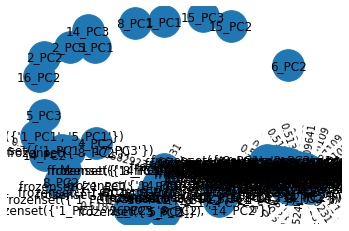

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import chain

#Crea un grafo vacio
G = nx.DiGraph()

#Arega los nodos del grafo utilizando los elementos únicos en las columnas antecedentes y consecuentes

G.add_nodes_from(set().union(*rulesaltaconfianzaplt['antecedents']))
G.add_nodes_from(set().union(*rulesaltaconfianzaplt['consequents']))

#Agrega las aristas del grafo utilizando los pares antecedente -> consecuente
for i, row in rulesaltaconfianzaplt.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], label=row['support'])

#Por último dibujamos el grafo
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'))
nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()

Voy a hacerlo con la confianza ma alta para tener menos reglas y observarlo mejor

In [70]:
reglasperfectas = association_rules(frequent_itemsets, metric='confidence', min_threshold=1)
reglasperfectas.head()

,antecedents,consequents,support
0,(2_PC2),(1_PC1),0.729588
1,"(2_PC2, 5_PC1)",(1_PC1),0.644543
2,"(8_PC1, 2_PC2)",(1_PC1),0.590732
3,"(5_PC2, 2_PC2)",(1_PC1),0.500594
4,"(2_PC2, 8_PC2)",(1_PC1),0.635885


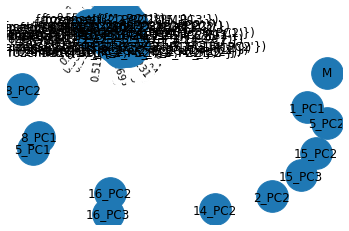

In [34]:
reglasperfectas= reglasperfectas[['antecedents','consequents','support']]

#Crea un grafo vacio
G = nx.DiGraph()

#Arega los nodos del grafo utilizando los elementos únicos en las columnas antecedentes y consecuentes

G.add_nodes_from(set().union(*reglasperfectas['antecedents']))
G.add_nodes_from(set().union(*reglasperfectas['consequents']))

#Agrega las aristas del grafo utilizando los pares antecedente -> consecuente
for i, row in reglasperfectas.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], label=row['support'])

#Por último dibujamos el grafo
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=1000)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'))
nx.draw_networkx_labels(G, pos)

plt.axis('off')
plt.show()

Representamos lift contra soporte: 

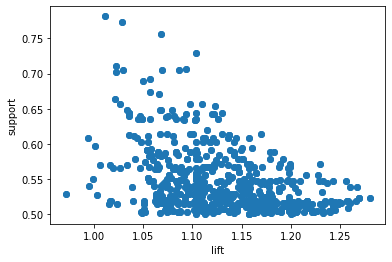

In [36]:
plt.scatter(rules['lift'], rules['support'])
plt.xlabel('lift')
plt.ylabel('support')
plt.show()

Efectivamente, no hay ninguna relación lineal entre el lift y el soporte. Lo que sí que se puede observar es que hay reglas que mientras tienen un soporte muy alto, el valor de lift es considerablemente bajo. Es decir, un conjunto de itemsets frecuentes con un umbral soporte aceptable, pero el umbral mínimo lift a la hora de la creación de las reglas es negativamente correlados. 

Observemos la confianza frente al soporte: 

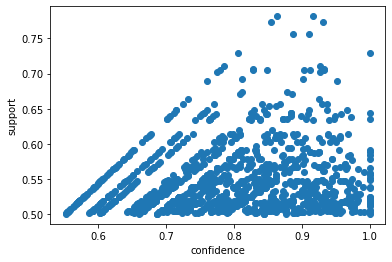

In [37]:
plt.scatter(rules['confidence'], rules['support'])
plt.xlabel('confidence')
plt.ylabel('support')
plt.show()

Es lógico que tenga esta forma, ya que la confianza se calcula como: 


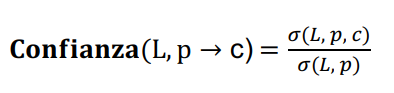

Mientras que el soporte es: Frecuencia de un conjunto entre el total de
transacciones. 

Por lo que a medida que aumenta el soporte del denominador, mayor será el valor de la confianza. 

Veamos ahora mediante otro diagrama de dispersión distintos criterios para clasificar si una regla es considerada como buena o mala. 

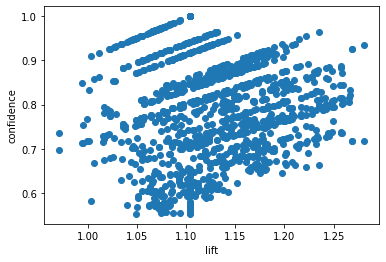

In [69]:
plt.scatter(rules['lift'], rules['confidence'])
plt.xlabel('lift')
plt.ylabel('confidence')
plt.show()

En esta gráfica se puede observar un poco de todo, es decir, parece que sutilmente hay una correlación lineal entre ambas pero no perfecta, ya que hay reglas que según el criterio de lift son negativamente correladas, es decir, no nos dicen nada, mientras que la confianza es superior a 0.7, es decir, se podrían incluso interpretar como potencialmente buenas. Es por eso que es importante respaldarse en distintos criterios. Sin embargo, por lo general, a medida que aumenta el lift, aumenta la confianza. 

Ahora se quiere observar cómo varía la confianza de una regla a medida que va a aumentando la longitud de los antecedentes. Para ello debemos crear una nueva columna en la cual se guarde registro de la longitud. 

In [38]:
rules['length'] = rules['antecedents'].apply(lambda x: len(x))

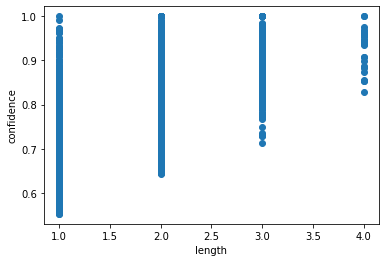

In [60]:
plt.scatter(rules['length'], rules['confidence'] )
plt.xlabel('length')
plt.ylabel('confidence')
plt.show()

Se puede observar cómo a medida que aumenta la longitud del antecedente de la regla, la confianza mínima aumenta. Esto se debe a que como bien hemos visto, la confianza se trata de: 

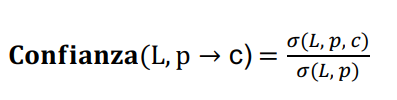




Por lo que se puede concluir que a medida que el denominador disminuye, significa que la longitud del antecedente es mayor, ya que la probabilidad de que aparezca un subconjunto de mayor longitud es menor, a que aparezca uno de longitud más pequeña. Es por eso que el valor de la confianza aumenta, a mediad que la longitud del antecedente aumenta. 

##Preguntas 


### 1. Prueba al menos tres configuraciones de soporte y frecuencia para cada género, edad y tipo de producto.

Para satisfacer el objetivo, primero se debe crear la base de datos únicamente con los atributos de género, edad y tipo de producto. 

Para ello concatenamos cada uno de ellos en data1, que será la base de datos con la que se trabaje a lo largo de la práctica.

In [40]:

Age_Range = df_Age.columns.values.tolist()
PC1_Range = df_Product_Category_1.columns.values.tolist()
PC2_Range = df_Product_Category_2.columns.values.tolist()
PC3_Range = df_Product_Category_3.columns.values.tolist()
Gender_Range = df_Gender.columns.values.tolist()
Names_Range=[Age_Range, PC1_Range, PC2_Range, PC3_Range, Gender_Range] 

In [41]:
data1 = pd.concat([df_Product_Category_1, df_Product_Category_2, df_Product_Category_3, df_Age, df_Gender], axis = 1)


Tal y como se dice, se prueban tres configuraciones diferentes para el soporte. Estos van a ser 0.4, 0.6 y 0.8. Obviamente se encontrarán más itemsets frecuentes en aquellos cuyo umbral sea mínimo, ya que más elementos satisfacen la condición. 

Guardamos en cada variable los itemsets frecuentes correspondientes a cada umbral. 

In [42]:
frequent_itemsets_40 = apriori(data1, min_support=0.4, use_colnames=True)
frequent_itemsets_60 = apriori(data1, min_support=0.6, use_colnames=True)
frequent_itemsets_80 = apriori(data1, min_support=0.8, use_colnames=True)

Según cómo se ha realizado tomando la base de datos original, se deben eliminar las categorías 0 que se había mencionado anteriormente así como relleno de NaN's, ya que esa información es inutil, y así ahorrar coste computacional 

In [43]:
frequents_with_zero_40=frequent_itemsets_40['itemsets'].apply(lambda x: '0_PC2' in x) |frequent_itemsets_40['itemsets'].apply(lambda x: '0_PC3' in x)
frequent_itemsets_40 = frequent_itemsets_40.drop(frequent_itemsets_40[frequents_with_zero_40].index)
frequents_with_zero_60=frequent_itemsets_60['itemsets'].apply(lambda x: '0_PC2' in x) |frequent_itemsets_60['itemsets'].apply(lambda x: '0_PC3' in x)
frequent_itemsets_60 = frequent_itemsets_60.drop(frequent_itemsets_60[frequents_with_zero_60].index)
frequents_with_zero_80=frequent_itemsets_80['itemsets'].apply(lambda x: '0_PC2' in x) |frequent_itemsets_80['itemsets'].apply(lambda x: '0_PC3' in x)
frequent_itemsets_80 = frequent_itemsets_80.drop(frequent_itemsets_80[frequents_with_zero_80].index)

Una vez ya han sido limpiados, creamos las reglas correspondientes, pero todas bajo el criterio de confianza, y un umbral mínimo de 0.6

In [44]:
rules_40 = association_rules(frequent_itemsets_40, metric='confidence', min_threshold=0.6, support_only=True)
rules_60 = association_rules(frequent_itemsets_60, metric='confidence', min_threshold=0.6, support_only=True)
rules_80 = association_rules(frequent_itemsets_80, metric='confidence', min_threshold=0.6, support_only=True)

### 2. ¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos (1 punto) 

La diferencia entre usar soporte y frecuencia a nivel teórico es que: 
- Frecuencia: El número de veces que aparece el/los elemento/s
- Soporte: El número de veces que aparece el/los elemento/s / total

Por lo que si estamos usando un umbral soporte de 0.6, tomamos el número de veces que ha aparecido ese item, entre el total, que en este caso según vemos es 5891, para que sean equivalentes. 


In [45]:
len(data1)

5891

In [61]:
frequent_itemsets_60['frecuencia'] = frequent_itemsets_60['support']*len(data1)

In [63]:
frequent_itemsets_60.head()

,support,itemsets,frecuencia
0,0.905958,(1_PC1),5337.0
1,0.852996,(5_PC1),5025.0
2,0.767951,(8_PC1),4524.0
4,0.729588,(2_PC2),4298.0
5,0.830929,(8_PC2),4895.0


Tomemos el primer ejemplo. Según hemos visto, la frecuencia será igual a el soporte * n:  



In [68]:
0.905958*len(data1)

5336.998578000001

Efectivamente se ha calculado de manera correcta, por lo que es insignificante usar frecuencia o soporte mientras se respete la equivalencia, es decir, no se puede poner como soporte mínimo 5000, ya que este oscila entre [0-1], mientras que la frecuencia oscila entre [0-len(data1)].

### 3. ¿Qué tipo reglas desaparecen según la configuración y categorías (género, edad y tipo de producto)consideradas? ¿Por qué? 

En cuanto al soporte, las reglas más específicas son aquellas cuyo umbral es menor, ya que incluye más items tanto en el antecedente como en el consecuente, ya que la confianza consiste en: Frecuencia con que los elementos en Y aparecen en
transacciones que contienen a X. Es decir, cuantos más elementos tengamos en el antecedente, mejor, ya que como es el denominador, cuanto más pequeño sea, significa que esa serie de itemsets aparece poco, por lo que mayor será el valor de la confianza. 

Además, como hemos tomado en la selección de los itemsets frecuentes, obviamente los que tengan menor umbral de soporte, contendrán más items frecuentes, por lo que a la hora de la creación de las reglas, se obtendrán más, ya que la longitud es mayor. 

 Sin embargo, conseguimos mayor precisión con un soporte mayor. 

In [46]:
rules_40 = association_rules(frequent_itemsets_40, metric='confidence', min_threshold=0.6, support_only=True)
rules_60 = association_rules(frequent_itemsets_60, metric='confidence', min_threshold=0.6, support_only=True)
rules_80 = association_rules(frequent_itemsets_80, metric='confidence', min_threshold=0.6, support_only=True)

Además según las categorías tomadas, todas aquellas reglas que contuviese tanto en el antecedente como en la consecuencia, un valor que no pertenezca a estas categorías, no será tomada, es decir, no se tomará en cuenta si el usuario está casado o no, la ciudad de residencia, o su trabajo. 

### 4. Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado interesantes obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold. Justifica los resultados.

In [47]:
frequent_itemsets_40_RULES =association_rules(frequent_itemsets_40, metric='lift', min_threshold=1.3)

In [48]:
frequent_itemsets_40_RULES

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(5_PC2),(2_PC1),0.592938,0.536581,0.422169,0.711995,1.326911,0.104010,1.609067
1,(2_PC1),(5_PC2),0.536581,0.592938,0.422169,0.786776,1.326911,0.104010,1.909083
2,(2_PC1),(15_PC3),0.536581,0.565099,0.407062,0.758621,1.342456,0.103840,1.801731
3,(15_PC3),(2_PC1),0.565099,0.536581,0.407062,0.720336,1.342456,0.103840,1.657058
4,(3_PC1),(4_PC2),0.485317,0.527075,0.446953,0.920951,1.747287,0.191155,5.982708
...,...,...,...,...,...,...,...,...,...
4693,"(16_PC3, 8_PC2)","(1_PC1, 8_PC1, 16_PC2, 5_PC1, 14_PC2)",0.602105,0.493804,0.407401,0.676628,1.370236,0.110079,1.565368
4694,"(16_PC2, 5_PC1)","(1_PC1, 8_PC1, 16_PC3, 14_PC2, 8_PC2)",0.639620,0.465116,0.407401,0.636943,1.369427,0.109904,1.473276
4695,"(16_PC2, 14_PC2)","(1_PC1, 8_PC1, 16_PC3, 5_PC1, 8_PC2)",0.584281,0.489391,0.407401,0.697269,1.424770,0.121459,1.686677
4696,"(16_PC2, 8_PC2)","(1_PC1, 8_PC1, 16_PC3, 5_PC1, 14_PC2)",0.635715,0.467323,0.407401,0.640854,1.371331,0.110317,1.483179


In [49]:
print(frequent_itemsets_40_RULES[frequent_itemsets_40_RULES['antecedents'].apply(lambda x: 'M' in x)])

            antecedents      consequents  antecedent support  \
106          (2_PC2, M)         (15_PC3)            0.551859   
308   (1_PC1, 2_PC2, M)         (15_PC3)            0.551859   
310          (2_PC2, M)  (1_PC1, 15_PC3)            0.551859   
390  (1_PC1, 16_PC3, M)         (15_PC2)            0.491767   
392         (16_PC3, M)  (1_PC1, 15_PC2)            0.503650   

     consequent support   support  confidence      lift  leverage  conviction  
106            0.565099  0.413342    0.749000  1.325431  0.101487    1.732674  
308            0.565099  0.413342    0.749000  1.325431  0.101487    1.732674  
310            0.560007  0.413342    0.749000  1.337484  0.104298    1.752963  
390            0.656765  0.423358    0.860891  1.310805  0.100382    2.467377  
392            0.638432  0.423358    0.840580  1.316633  0.101812    2.268021  


Vemos que para un soporte de 0.4 no hay ni mujeres ni edades, por lo que disminuimos el soporte a 0.3, y hacemos la limpieza de los 0's tal y como se ha realizado a lo largo de la práctica. 

In [50]:
frequent_itemsets_30 = apriori(data1, min_support=0.3, use_colnames=True)
frequents_with_zero_30=frequent_itemsets_30['itemsets'].apply(lambda x: '0_PC2' in x) |frequent_itemsets_30['itemsets'].apply(lambda x: '0_PC3' in x)
frequent_itemsets_30 = frequent_itemsets_30.drop(frequent_itemsets_30[frequents_with_zero_30].index)

Ahora creamos las reglas de asociación bajo el criterio de lift. Este criterio cuantifica la relación existente entre X e Y, es decir: 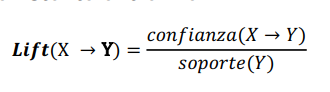

Y además pondremos de umbral mínimo 1.01, ya que: 
- Lift(X → Y ) = 1, si X e Y son independientes.
- Lift(X → Y ) < 1, si X e Y están negativamente correlados
- Lift(X → Y ) > 1, si X e Y están positivamente correlados.

Por lo que lo que se desea es que estén positivamente correlados, es decir, que en base a la ocurrencia de uno se pueda predecir la presencia de otro. 

In [51]:
frequent_itemsets_30_RULES =association_rules(frequent_itemsets_30, metric='lift', min_threshold=1.01)

Ahora obtengamos todas las reglas cuyo antecedente sea la edad comprendida entre 26-35, para observarlas y poder interpretarlas. Consideramos que la edad es un criterio interesante, ya que poder predecir lo que compran los jóvenes implica a proyecto futuro, observar aquellas calles que sean más frecuentadas por ese rango de edad, de tal manera que los mercados que se instalen ahí, puedan ofrecer productos que llamen la atención, y de esta manera optimizar las ventas. 

In [52]:
print(frequent_itemsets_30_RULES[frequent_itemsets_30_RULES['antecedents'].apply(lambda x: '26-35' in x)])

    antecedents consequents  antecedent support  consequent support   support  \
53      (26-35)     (1_PC1)            0.348498            0.905958  0.326600   
195     (26-35)     (5_PC1)            0.348498            0.852996  0.301307   
421     (26-35)     (8_PC2)            0.348498            0.830929  0.301477   

     confidence      lift  leverage  conviction  
53     0.937165  1.034446  0.010876    1.496649  
195    0.864588  1.013590  0.004040    1.085608  
421    0.865075  1.041095  0.011900    1.253082  


Probemos a realizar una comparación de aparición de reglas con un umbral de soporte mínimo de 0.4, y en la creación de reglas, un criterio de confianza bajo un umbral de 0.6. 
Se predice que la aparición sea menor, ya que el umbral de soporte es mayor, y aunque el lift sea un mejor criterio para la obtención de reglas, según se ha visto en clase con las tablas de contingencia, el umbral es mínimo. 

In [53]:
print(frequent_itemsets_40_RULES[frequent_itemsets_40_RULES['antecedents'].apply(lambda x: '26-35' in x)])

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []


Efectivamente, la aparición de reglas cuyo antecedente sea la edad comprendida entre 26 y 35 años es inexistente. 

### 5. - Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los clientes? Expón las conclusiones respaldadas con datos

Tomaremos como criterio que las mejores configuraciones son aquellas cuyo lift sea mayor que 1.3, y el umbral de soporte en la selección de items frecuentes es 40. 


Se debe tener en cuenta que cuando se usa el criterio de lift, una de sus carecterísticas es que es simétrico, es decir: Lift(X → Y) = Lift (Y → X) 
Esto quiere decir que las reglas X → Y van a aparecer también como Y → X. Pongamos un ejemplo: 

In [54]:
frequent_itemsets_40_RULES =association_rules(frequent_itemsets_40, metric='lift', min_threshold=1.01)

In [55]:
print(frequent_itemsets_40_RULES[frequent_itemsets_40_RULES['antecedents'].apply(lambda x: 'M' in x)])

              antecedents             consequents  antecedent support  \
45                    (M)                 (1_PC1)            0.717196   
183                   (M)                 (2_PC2)            0.717196   
213                   (M)                 (5_PC2)            0.717196   
273                   (M)                (15_PC2)            0.717196   
287                   (M)                (16_PC2)            0.717196   
...                   ...                     ...                 ...   
12977  (8_PC2, M, 14_PC2)          (8_PC1, 5_PC1)            0.470718   
12980          (8_PC1, M)  (8_PC2, 5_PC1, 14_PC2)            0.550331   
12983          (M, 5_PC1)  (8_PC2, 8_PC1, 14_PC2)            0.608216   
12985         (M, 14_PC2)   (8_PC1, 5_PC1, 8_PC2)            0.527924   
12987          (M, 8_PC2)  (8_PC1, 5_PC1, 14_PC2)            0.596673   

       consequent support   support  confidence      lift  leverage  \
45               0.905958  0.663724    0.925444  1.0

In [56]:
print(frequent_itemsets_40_RULES[frequent_itemsets_40_RULES['consequents'].apply(lambda x: 'M' in x)])

           antecedents                consequents  antecedent support  \
44             (1_PC1)                        (M)            0.905958   
182            (2_PC2)                        (M)            0.729588   
212            (5_PC2)                        (M)            0.592938   
272           (15_PC2)                        (M)            0.656765   
286           (16_PC2)                        (M)            0.723986   
...                ...                        ...                 ...   
12986  (8_PC2, 14_PC2)          (8_PC1, M, 5_PC1)            0.671533   
12988          (8_PC1)  (8_PC2, M, 5_PC1, 14_PC2)            0.767951   
12989          (5_PC1)  (8_PC2, 8_PC1, M, 14_PC2)            0.852996   
12990         (14_PC2)   (8_PC1, M, 5_PC1, 8_PC2)            0.757936   
12991          (8_PC2)  (8_PC1, M, 5_PC1, 14_PC2)            0.830929   

       consequent support   support  confidence      lift  leverage  \
44               0.717196  0.663724    0.732621  1.0

Se puede observar cómo si (2_PC2, M) → (15_PC3), pues entonces aparece también (15_PC3) → (2_PC2, M), obviamente, con el mismo Lift, debido a sus características. Por lo que repetirse como tal no se repiten, sin embargo, busca todas las reglas posibles para un itemset dado. 

Esta carecterística en concreto implica que, en un caso idílico en el que M → 1_PC1, ya sabemos que si es hombre, el producto que comprará seguro es de categoría uno de la primera categoría, pero según está característica de este criterio, si se compra un producto que pertenece a 1_PC1, seguro va a ser un hombre, ya que 1_PC1 → M. 


Dado a lo que se ha explicado anteriormente sobre la cantidad de información recogida de las mujeres, con estas configuraciones, no se encuentra ninguna información sobre ellas, por lo que no se puede concluir, sin embargo, sobre los hombres se puede decir que sólo se ha obtenido información sobre el tipo de producto que compran, no de la edad. 

##Evaluación

##Despliegue